In [1]:
import matplotlib.pyplot as plt
import numpy as np

# number of data
N=4000
# size of each sample
L=2
# box size
B=100

!mkdir DATA

mkdir: cannot create directory ‘DATA’: File exists


2 5 1


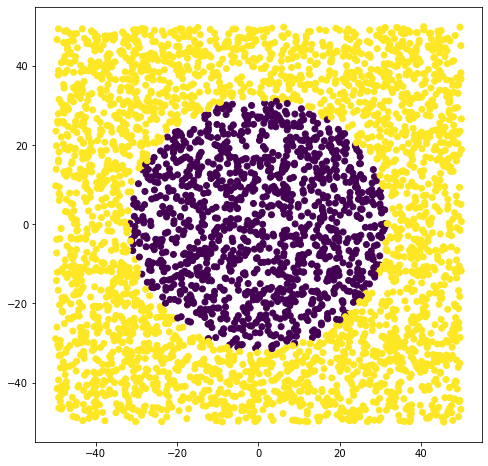

In [2]:
%run nonlinear_function.py

TYPE=3

# random seed for reproducibility
np.random.seed(12345)
print(np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10))

x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
        
plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

np.savetxt(filename("data",TYPE),x)
np.savetxt(filename("labels",TYPE),y,fmt="%d")

In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib.pyplot as plt
plt.rcParams['font.size']=14

%run nonlinear_function.py

#training data 
perc_train=0.8

2
[-31.60811883 -29.54397214] 1.0
[6.77250291 9.5544703 ] 0.0
[46.45145197 15.31770969] 1.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 1.0
[-49.16117021 -39.35556233] 1.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 1.0
[46.46475974 22.36853469] 1.0
[14.24753279 21.74536208] 0.0
data: 4000
train: 3200


<function matplotlib.pyplot.show(close=None, block=None)>

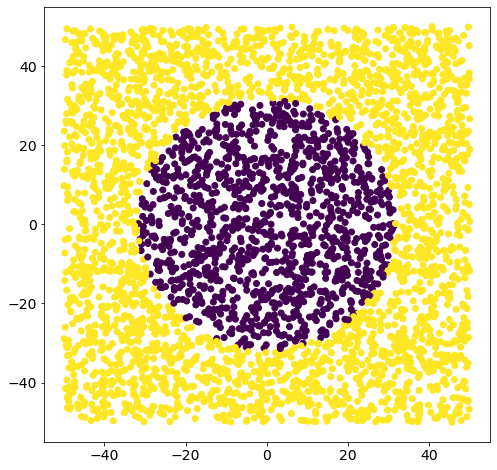

In [4]:
#keras work with numpy arrays: just use them from the start
TYPE=3
x= np.loadtxt(filename("data",TYPE), delimiter=' ')
y= np.loadtxt(filename("labels",TYPE), delimiter=' ')
N= len(x)

# dim. of a sample
L=len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])
    
N_train= int(perc_train*N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize =(8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

In [5]:
(x_train, y_train)=(x[0:N_train],y[0:N_train])
(x_valid, y_valid)=(x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


In [6]:
def Rescale(x):
    return (x-x.mean())/np.sqrt(x.var())
    #return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)
print(x_train)

[[-1.09854886 -1.02696928]
 [ 0.23239757  0.32886942]
 [ 1.60836682  0.52872451]
 ...
 [-1.71033821 -0.58010476]
 [ 0.45209286 -0.58910521]
 [ 1.55988736  0.94632066]]


In [7]:
# reproducibility
np.random.seed(12345)

CASE=1

if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=500
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='sigmoid'))
    model.add(Dense(20,activation='sigmoid'))
    model.add(Dense(20,activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 25)                75        
                                                                 
 dense_2 (Dense)             (None, 25)                650       
                                                                 
 dense_3 (Dense)             (None, 25)                650       
                                                                 
 dense_4 (Dense)             (None, 25)                650       
                                                                 
 dense_5 (Dense)             (None, 25)                650       
                                                                 
 dense_6 (Dense)             (None, 25)                6

In [8]:
model.compile(loss='binary_crossentropy',
               optimizer="RMSprop",
               #optimizer='adam',
               metrics=['accuracy'])

In [9]:
fit = model.fit(x_train, y_train,
                epochs = nepoch, batch_size = 90,
                validation_data=(x_valid,y_valid),
                verbose=2)

Epoch 1/500
36/36 - 1s - loss: 0.5970 - accuracy: 0.6747 - val_loss: 0.5292 - val_accuracy: 0.6875 - 1s/epoch - 36ms/step
Epoch 2/500
36/36 - 0s - loss: 0.5024 - accuracy: 0.7203 - val_loss: 0.4819 - val_accuracy: 0.7312 - 110ms/epoch - 3ms/step
Epoch 3/500
36/36 - 0s - loss: 0.4878 - accuracy: 0.7284 - val_loss: 0.4736 - val_accuracy: 0.7325 - 110ms/epoch - 3ms/step
Epoch 4/500
36/36 - 0s - loss: 0.4786 - accuracy: 0.7341 - val_loss: 0.4659 - val_accuracy: 0.7450 - 107ms/epoch - 3ms/step
Epoch 5/500
36/36 - 0s - loss: 0.4754 - accuracy: 0.7366 - val_loss: 0.4721 - val_accuracy: 0.7425 - 121ms/epoch - 3ms/step
Epoch 6/500
36/36 - 0s - loss: 0.4699 - accuracy: 0.7406 - val_loss: 0.4592 - val_accuracy: 0.7475 - 110ms/epoch - 3ms/step
Epoch 7/500
36/36 - 0s - loss: 0.4677 - accuracy: 0.7394 - val_loss: 0.4543 - val_accuracy: 0.7400 - 107ms/epoch - 3ms/step
Epoch 8/500
36/36 - 0s - loss: 0.4644 - accuracy: 0.7469 - val_loss: 0.4483 - val_accuracy: 0.7513 - 109ms/epoch - 3ms/step
Epoch 9/50

Epoch 67/500
36/36 - 0s - loss: 0.0639 - accuracy: 0.9719 - val_loss: 0.0615 - val_accuracy: 0.9800 - 110ms/epoch - 3ms/step
Epoch 68/500
36/36 - 0s - loss: 0.0611 - accuracy: 0.9775 - val_loss: 0.0840 - val_accuracy: 0.9588 - 103ms/epoch - 3ms/step
Epoch 69/500
36/36 - 0s - loss: 0.0601 - accuracy: 0.9753 - val_loss: 0.0587 - val_accuracy: 0.9725 - 104ms/epoch - 3ms/step
Epoch 70/500
36/36 - 0s - loss: 0.0642 - accuracy: 0.9678 - val_loss: 0.0554 - val_accuracy: 0.9787 - 107ms/epoch - 3ms/step
Epoch 71/500
36/36 - 0s - loss: 0.0530 - accuracy: 0.9759 - val_loss: 0.0844 - val_accuracy: 0.9712 - 103ms/epoch - 3ms/step
Epoch 72/500
36/36 - 0s - loss: 0.0516 - accuracy: 0.9806 - val_loss: 0.1273 - val_accuracy: 0.9463 - 105ms/epoch - 3ms/step
Epoch 73/500
36/36 - 0s - loss: 0.0684 - accuracy: 0.9716 - val_loss: 0.1091 - val_accuracy: 0.9538 - 101ms/epoch - 3ms/step
Epoch 74/500
36/36 - 0s - loss: 0.0565 - accuracy: 0.9762 - val_loss: 0.0543 - val_accuracy: 0.9750 - 105ms/epoch - 3ms/step


Epoch 133/500
36/36 - 0s - loss: 0.0484 - accuracy: 0.9800 - val_loss: 0.0881 - val_accuracy: 0.9688 - 93ms/epoch - 3ms/step
Epoch 134/500
36/36 - 0s - loss: 0.0476 - accuracy: 0.9800 - val_loss: 0.0761 - val_accuracy: 0.9650 - 94ms/epoch - 3ms/step
Epoch 135/500
36/36 - 0s - loss: 0.0535 - accuracy: 0.9759 - val_loss: 0.0451 - val_accuracy: 0.9800 - 92ms/epoch - 3ms/step
Epoch 136/500
36/36 - 0s - loss: 0.0438 - accuracy: 0.9825 - val_loss: 0.0629 - val_accuracy: 0.9737 - 92ms/epoch - 3ms/step
Epoch 137/500
36/36 - 0s - loss: 0.0436 - accuracy: 0.9819 - val_loss: 0.0324 - val_accuracy: 0.9900 - 95ms/epoch - 3ms/step
Epoch 138/500
36/36 - 0s - loss: 0.0526 - accuracy: 0.9772 - val_loss: 0.0410 - val_accuracy: 0.9825 - 97ms/epoch - 3ms/step
Epoch 139/500
36/36 - 0s - loss: 0.0449 - accuracy: 0.9822 - val_loss: 0.0387 - val_accuracy: 0.9825 - 94ms/epoch - 3ms/step
Epoch 140/500
36/36 - 0s - loss: 0.0435 - accuracy: 0.9809 - val_loss: 0.0419 - val_accuracy: 0.9750 - 93ms/epoch - 3ms/step


Epoch 199/500
36/36 - 0s - loss: 0.0404 - accuracy: 0.9841 - val_loss: 0.0455 - val_accuracy: 0.9825 - 106ms/epoch - 3ms/step
Epoch 200/500
36/36 - 0s - loss: 0.0419 - accuracy: 0.9825 - val_loss: 0.0223 - val_accuracy: 0.9925 - 106ms/epoch - 3ms/step
Epoch 201/500
36/36 - 0s - loss: 0.0363 - accuracy: 0.9847 - val_loss: 0.0738 - val_accuracy: 0.9750 - 105ms/epoch - 3ms/step
Epoch 202/500
36/36 - 0s - loss: 0.0368 - accuracy: 0.9834 - val_loss: 0.0589 - val_accuracy: 0.9725 - 106ms/epoch - 3ms/step
Epoch 203/500
36/36 - 0s - loss: 0.0430 - accuracy: 0.9812 - val_loss: 0.0226 - val_accuracy: 0.9962 - 99ms/epoch - 3ms/step
Epoch 204/500
36/36 - 0s - loss: 0.0378 - accuracy: 0.9850 - val_loss: 0.0377 - val_accuracy: 0.9862 - 107ms/epoch - 3ms/step
Epoch 205/500
36/36 - 0s - loss: 0.0356 - accuracy: 0.9853 - val_loss: 0.0951 - val_accuracy: 0.9725 - 106ms/epoch - 3ms/step
Epoch 206/500
36/36 - 0s - loss: 0.0444 - accuracy: 0.9803 - val_loss: 0.1425 - val_accuracy: 0.9663 - 105ms/epoch - 3m

36/36 - 0s - loss: 0.0331 - accuracy: 0.9862 - val_loss: 0.0466 - val_accuracy: 0.9800 - 105ms/epoch - 3ms/step
Epoch 265/500
36/36 - 0s - loss: 0.0344 - accuracy: 0.9847 - val_loss: 0.0316 - val_accuracy: 0.9862 - 114ms/epoch - 3ms/step
Epoch 266/500
36/36 - 0s - loss: 0.0342 - accuracy: 0.9850 - val_loss: 0.0327 - val_accuracy: 0.9862 - 107ms/epoch - 3ms/step
Epoch 267/500
36/36 - 0s - loss: 0.0428 - accuracy: 0.9834 - val_loss: 0.0282 - val_accuracy: 0.9850 - 108ms/epoch - 3ms/step
Epoch 268/500
36/36 - 0s - loss: 0.0334 - accuracy: 0.9850 - val_loss: 0.0652 - val_accuracy: 0.9688 - 115ms/epoch - 3ms/step
Epoch 269/500
36/36 - 0s - loss: 0.0414 - accuracy: 0.9837 - val_loss: 0.0461 - val_accuracy: 0.9812 - 109ms/epoch - 3ms/step
Epoch 270/500
36/36 - 0s - loss: 0.0348 - accuracy: 0.9844 - val_loss: 0.0557 - val_accuracy: 0.9775 - 133ms/epoch - 4ms/step
Epoch 271/500
36/36 - 0s - loss: 0.0391 - accuracy: 0.9844 - val_loss: 0.0477 - val_accuracy: 0.9812 - 147ms/epoch - 4ms/step
Epoch 

Epoch 330/500
36/36 - 0s - loss: 0.0319 - accuracy: 0.9869 - val_loss: 0.0690 - val_accuracy: 0.9762 - 107ms/epoch - 3ms/step
Epoch 331/500
36/36 - 0s - loss: 0.0276 - accuracy: 0.9891 - val_loss: 0.1399 - val_accuracy: 0.9588 - 105ms/epoch - 3ms/step
Epoch 332/500
36/36 - 0s - loss: 0.0350 - accuracy: 0.9862 - val_loss: 0.0443 - val_accuracy: 0.9837 - 104ms/epoch - 3ms/step
Epoch 333/500
36/36 - 0s - loss: 0.0340 - accuracy: 0.9837 - val_loss: 0.0507 - val_accuracy: 0.9825 - 109ms/epoch - 3ms/step
Epoch 334/500
36/36 - 0s - loss: 0.0304 - accuracy: 0.9856 - val_loss: 0.0486 - val_accuracy: 0.9775 - 105ms/epoch - 3ms/step
Epoch 335/500
36/36 - 0s - loss: 0.0338 - accuracy: 0.9844 - val_loss: 0.0275 - val_accuracy: 0.9875 - 108ms/epoch - 3ms/step
Epoch 336/500
36/36 - 0s - loss: 0.0345 - accuracy: 0.9859 - val_loss: 0.0737 - val_accuracy: 0.9688 - 108ms/epoch - 3ms/step
Epoch 337/500
36/36 - 0s - loss: 0.0332 - accuracy: 0.9866 - val_loss: 0.0623 - val_accuracy: 0.9800 - 111ms/epoch - 3

36/36 - 0s - loss: 0.0337 - accuracy: 0.9837 - val_loss: 0.0155 - val_accuracy: 0.9937 - 110ms/epoch - 3ms/step
Epoch 396/500
36/36 - 0s - loss: 0.0293 - accuracy: 0.9866 - val_loss: 0.0666 - val_accuracy: 0.9762 - 110ms/epoch - 3ms/step
Epoch 397/500
36/36 - 0s - loss: 0.0322 - accuracy: 0.9866 - val_loss: 0.0207 - val_accuracy: 0.9937 - 109ms/epoch - 3ms/step
Epoch 398/500
36/36 - 0s - loss: 0.0337 - accuracy: 0.9862 - val_loss: 0.0464 - val_accuracy: 0.9825 - 111ms/epoch - 3ms/step
Epoch 399/500
36/36 - 0s - loss: 0.0341 - accuracy: 0.9859 - val_loss: 0.0370 - val_accuracy: 0.9837 - 107ms/epoch - 3ms/step
Epoch 400/500
36/36 - 0s - loss: 0.0267 - accuracy: 0.9884 - val_loss: 0.0182 - val_accuracy: 0.9925 - 109ms/epoch - 3ms/step
Epoch 401/500
36/36 - 0s - loss: 0.0334 - accuracy: 0.9828 - val_loss: 0.0408 - val_accuracy: 0.9850 - 108ms/epoch - 3ms/step
Epoch 402/500
36/36 - 0s - loss: 0.0284 - accuracy: 0.9872 - val_loss: 0.0504 - val_accuracy: 0.9775 - 107ms/epoch - 3ms/step
Epoch 

Epoch 461/500
36/36 - 0s - loss: 0.0291 - accuracy: 0.9878 - val_loss: 0.0208 - val_accuracy: 0.9937 - 112ms/epoch - 3ms/step
Epoch 462/500
36/36 - 0s - loss: 0.0337 - accuracy: 0.9853 - val_loss: 0.0614 - val_accuracy: 0.9712 - 109ms/epoch - 3ms/step
Epoch 463/500
36/36 - 0s - loss: 0.0298 - accuracy: 0.9862 - val_loss: 0.0198 - val_accuracy: 0.9912 - 110ms/epoch - 3ms/step
Epoch 464/500
36/36 - 0s - loss: 0.0292 - accuracy: 0.9869 - val_loss: 0.0292 - val_accuracy: 0.9862 - 109ms/epoch - 3ms/step
Epoch 465/500
36/36 - 0s - loss: 0.0286 - accuracy: 0.9872 - val_loss: 0.0494 - val_accuracy: 0.9812 - 107ms/epoch - 3ms/step
Epoch 466/500
36/36 - 0s - loss: 0.0328 - accuracy: 0.9862 - val_loss: 0.0176 - val_accuracy: 0.9925 - 108ms/epoch - 3ms/step
Epoch 467/500
36/36 - 0s - loss: 0.0264 - accuracy: 0.9872 - val_loss: 0.0504 - val_accuracy: 0.9750 - 104ms/epoch - 3ms/step
Epoch 468/500
36/36 - 0s - loss: 0.0255 - accuracy: 0.9891 - val_loss: 0.0485 - val_accuracy: 0.9812 - 109ms/epoch - 3

[0.02865631878376007, 0.03918294981122017]


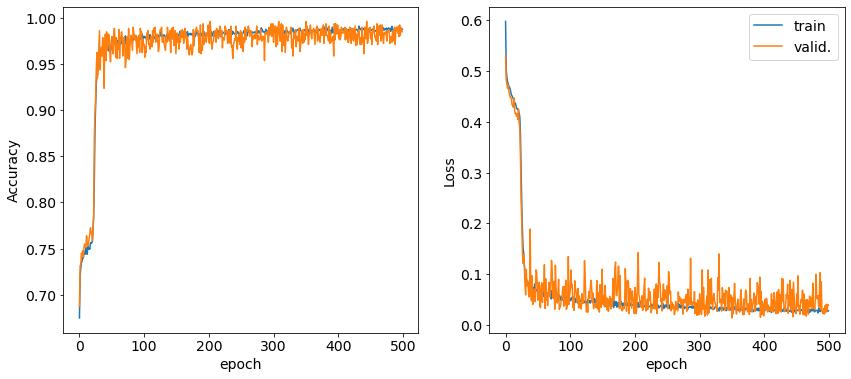

In [10]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train")
ax.plot(fit.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax=AX[1]
ax.plot(fit.history['loss'],label="train")
ax.plot(fit.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
a=[]
a.append(fit.history['loss'][-1])
a.append(fit.history['val_loss'][-1])
print(a)
plt.savefig('LC-C-G.png')

In [11]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/(50/x_train[:,1].max())
pred = model.predict(grid_r)

51 2601
[50. 50.]


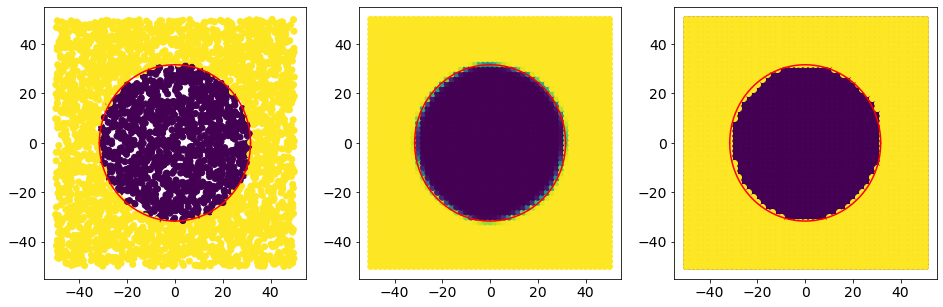

In [12]:
def f(x):
    return (1000-x**2)**(1/2)
def boundaries(): 
    x=np.linspace(-np.sqrt(1000),np.sqrt(1000),4000)
    ax.plot(x,f(x),c="r")
    ax.plot(x,-f(x),c="r")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()
plt.show
plt.savefig('C-G.png')